In [1]:
import os
import pandas as pd
import fastparquet
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-eza850ac because the default path (/home/ljama/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Configurar pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Si también deseas mostrar todas las columnas, puedes usar:
pd.set_option('display.max_columns', None)


In [4]:
PROJECT_NAME = '.'

try:
    from google.colab import drive
    ROOT = '/content/drive/'
    drive.mount(ROOT, force_remount=True)
    IN_COLAB = True
    BASE_FOLDER = ROOT + 'MyDrive/' + PROJECT_NAME
    DATASET_FOLDER = BASE_FOLDER

except:
    ROOT = '/kaggle'
    IN_COLAB = False
    BASE_FOLDER = os.path.join("/kaggle/working", PROJECT_NAME)
    DATASET_FOLDER = os.path.join("/kaggle/input", PROJECT_NAME)


In [245]:
# Variables Globales
path_data_input_parquet_file = os.path.join(PROJECT_NAME, "dataset/drugs_data.parquet")
path_data_output_parquet_file = os.path.join(PROJECT_NAME, "dataset/drugs_data_final.parquet")

In [8]:
df_drugs = pd.read_parquet(path_data_input_parquet_file)

In [9]:
# Visualización de las primeras filas:
display(df_drugs.head(3))

,active_ingredient,adverse_reactions,brand_name,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,clinical_pharmacology_table,clinical_studies_table,contraindications,description,dosage_and_administration,effective_time,general_precautions,generic_name,geriatric_use,id,inactive_ingredient,indications_and_usage,last_updated,manufacturer_name,nursing_mothers,overdosage,package_label_principal_display_panel,pharmacogenomics_table,precautions,pregnancy,pregnancy_or_breast_feeding,product_type,storage_and_handling,substance_name,use_in_specific_populations,warnings,when_using
0,Drug Facts Active ingredient Ethyl Alcohol 61%,,,,,,,DOVE NOURISHING HAND SANITIZER LAVENDER & CHAM...,Directions • Wet hands thoroughly with product...,20220429,,,,ddcb15c2-4b75-55e3-e053-2995a90a2142,"Inactive ingredients Water (Aqua), Glycerin, G...",Uses • Hand sanitizer to help reduce bacteria ...,2024-10-26,,,,Packaging Dove Hand Sanitizer Lavender,,,,,,,,,Warnings For external use only Flammable. Keep...,
1,"Active ingredient (in each 5 mL) Ibuprofen, US...",,,,,,,,Directions this product does not contain direc...,20240612,,,,fb799360-8778-47fe-acb1-1805e8070a3b,"Inactive ingredients acesulfame potassium, art...",Uses temporarily relieves minor aches and pain...,2024-10-26,,,,Principal Display Panel Compare to Children's ...,,,,,,Other information each 5 mL contains : sodium ...,,,Warnings Allergy alert : Ibuprofen may cause a...,When using this product take with food or milk...
2,Active Ingredients Purpose Titanium Dioxide 7....,,foundcealer multi-tasking foundation Broad Spe...,,,,,,Directions Shake before use. Apply liberally 1...,20231219,,TITANIUM DIOXIDE AND ZINC OXIDE,,ff5bd785-d7c5-45ca-9f17-0e2a6f4ab644,"Inactive Ingredients Water/Aqua/Eau, phenyl tr...",Uses Helps prevent sunburn. If used as directe...,2024-10-26,"Tarte, Inc.",,,PRINCIPAL DISPLAY PANEL - 10 mL Bottle Carton ...,,,,,HUMAN OTC DRUG,Other information Protect the product in this ...,TITANIUM DIOXIDE ZINC OXIDE,,Warnings For external use only. Stop use and a...,When using this product keep out of eyes. Rins...


In [10]:
# Información general del dataset:
display(df_drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233538 entries, 0 to 233537
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   active_ingredient                                           233538 non-null  object
 1   adverse_reactions                                           233538 non-null  object
 2   brand_name                                                  233538 non-null  object
 3   carcinogenesis_and_mutagenesis_and_impairment_of_fertility  233538 non-null  object
 4   clinical_pharmacology_table                                 233538 non-null  object
 5   clinical_studies_table                                      233538 non-null  object
 6   contraindications                                           233538 non-null  object
 7   description                                                 233538 non-null  object

None

In [11]:
# Resumen estadístico de las columnas numéricas:
display(df_drugs.describe().transpose())

,count,unique,top,freq
active_ingredient,233538,56923,,90172
adverse_reactions,233538,41159,,150943
brand_name,233538,39275,,145380
carcinogenesis_and_mutagenesis_and_impairment_of_fertility,233538,13202,,176950
clinical_pharmacology_table,233538,15561,,207867
clinical_studies_table,233538,16439,,207617
contraindications,233538,24484,,152598
description,233538,45151,,147614
dosage_and_administration,233538,85976,,11880
effective_time,233538,5593,20190815,696


In [12]:
# Contar la cantidad de cadenas vacías en cada columna
cantidad_cadenas_vacias = (df_drugs.apply(lambda x: x.str.len() == 0)).sum()

# Calcular el porcentaje de cadenas vacías en cada columna
porcentaje_cadenas_vacias = (df_drugs.apply(lambda x: x.str.len() == 0)).mean() * 100

# Combinar ambos resultados en un DataFrame
resumen_ausentes = pd.DataFrame({
    'Cantidad de Valores Ausentes': cantidad_cadenas_vacias.sort_values(),
    'Porcentaje Valores Ausentes': porcentaje_cadenas_vacias.sort_values()
})

# Aplicar formato de porcentaje a dos decimales en la columna de porcentaje
#resumen_ausentes['Porcentaje Valores Ausentes'] = resumen_ausentes['Porcentaje Valores Ausentes'].map("{:.2f}%".format)

print("Resumen de valores ausentes (cadenas vacías) por columna:")
display(resumen_ausentes)

Resumen de valores ausentes (cadenas vacías) por columna:


,Cantidad de Valores Ausentes,Porcentaje Valores Ausentes
id,0,0.000000
effective_time,0,0.000000
last_updated,0,0.000000
package_label_principal_display_panel,689,0.295027
indications_and_usage,11093,4.749976
dosage_and_administration,11880,5.086967
warnings,51346,21.986144
inactive_ingredient,88499,37.894904
active_ingredient,90172,38.611275
manufacturer_name,145380,62.251111


In [13]:
resumen_ausentes.describe().style.format("{:.0f}")

,Cantidad de Valores Ausentes,Porcentaje Valores Ausentes
count,31,31
mean,131440,56
std,73414,31
min,0,0
25%,89336,38
50%,150943,65
75%,184558,79
max,233534,100


233538


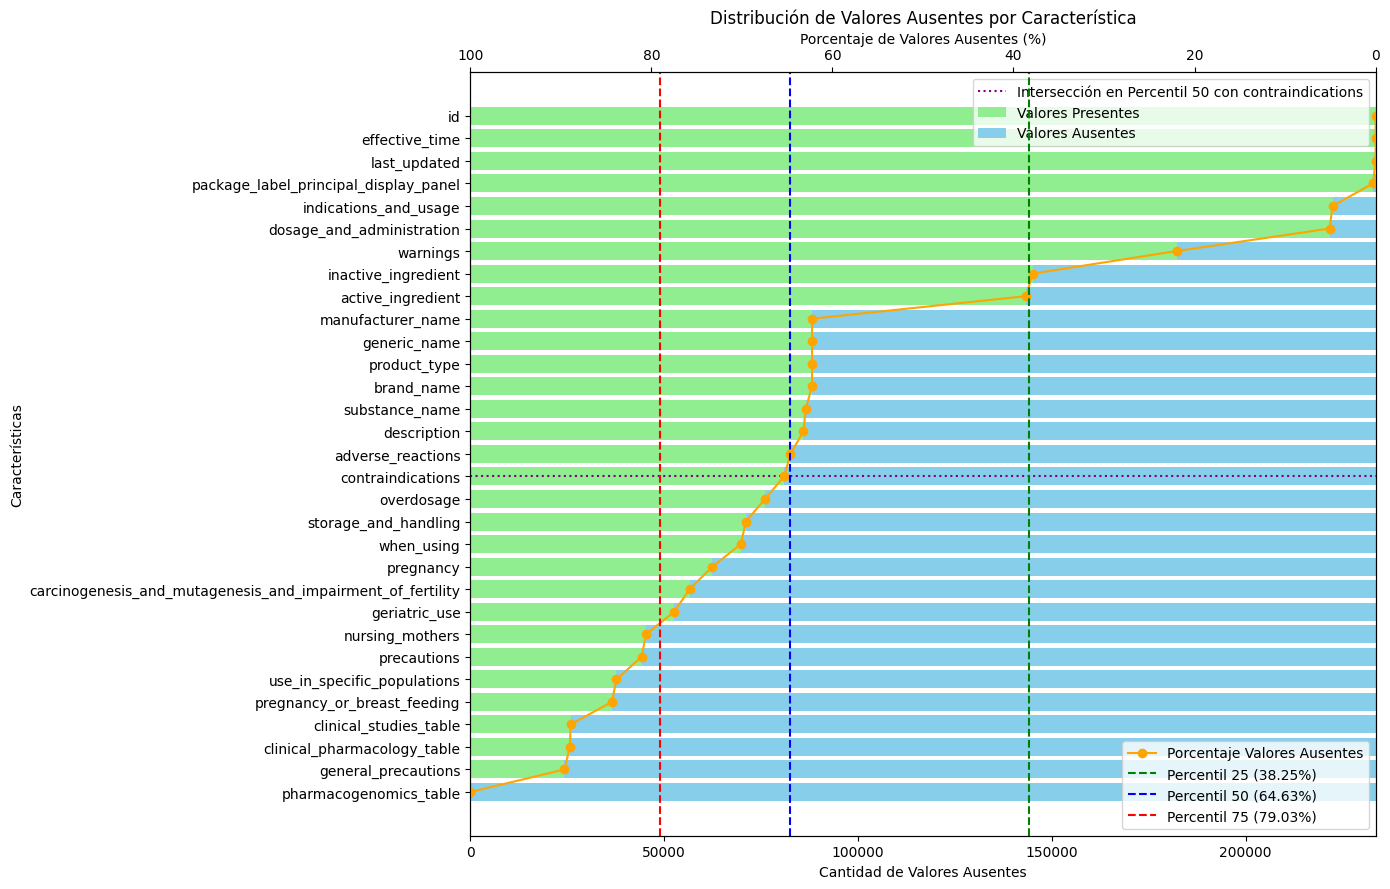

In [14]:
# Calculate the number of present values based on total count of dataset (assuming total count is 233538)
total_count = len(df_drugs)
print(total_count)

resumen_ausentes['Cantidad de Valores Presentes'] = total_count - resumen_ausentes['Cantidad de Valores Ausentes']
resumen_ausentes['Porcentaje Valores Presentes'] = 100 - resumen_ausentes['Porcentaje Valores Ausentes']


# Calcular los percentiles 25, 50 y 75 del porcentaje de valores ausentes
percentil_25 = resumen_ausentes['Porcentaje Valores Ausentes'].quantile(0.25)
percentil_50 = resumen_ausentes['Porcentaje Valores Ausentes'].quantile(0.50)
percentil_75 = resumen_ausentes['Porcentaje Valores Ausentes'].quantile(0.75)


# Identificar la característica que corresponde al percentil 25
caracteristica_percentil_50 = resumen_ausentes[resumen_ausentes['Porcentaje Valores Ausentes'] > percentil_50].index[0]

# Crear la figura y el gráfico
fig, ax1 = plt.subplots(figsize=(14, 9))

# Gráfico de barras para visualizar los valores presentes
ax1.barh(resumen_ausentes.index, resumen_ausentes['Cantidad de Valores Presentes'], color='lightgreen', label='Valores Presentes')


# Gráfico de barras para visualizar los valores ausentes
ax1.barh(resumen_ausentes.index, resumen_ausentes['Cantidad de Valores Ausentes'], left=resumen_ausentes['Cantidad de Valores Presentes'], color='skyblue', label='Valores Ausentes')


ax1.set_xlabel('Cantidad de Valores Ausentes')
ax1.set_ylabel('Características')
ax1.invert_yaxis()

# Crear un segundo eje y para el porcentaje de valores ausentes
ax2 = ax1.twiny()
ax2.plot(resumen_ausentes['Porcentaje Valores Ausentes'], resumen_ausentes.index, 'o-', color='orange', label='Porcentaje Valores Ausentes', )
ax2.set_xlim(100, 0)  # Orden descendente de 100 a 0
ax2.set_xlabel('Porcentaje de Valores Ausentes (%)')

# Agregar líneas de percentiles en el gráfico de porcentaje de valores ausentes
ax2.axvline(x=percentil_25, color='green', linestyle='--', label=f'Percentil 25 ({percentil_25:.2f}%)')
ax2.axvline(x=percentil_50, color='blue', linestyle='--', label=f'Percentil 50 ({percentil_50:.2f}%)')
ax2.axvline(x=percentil_75, color='red', linestyle='--', label=f'Percentil 75 ({percentil_75:.2f}%)')

# Trazar una línea horizontal en la intersección con la característica en el percentil 25
ax1.axhline(y=caracteristica_percentil_50, color='purple', linestyle=':', label=f'Intersección en Percentil 50 con {caracteristica_percentil_50}')

# Agregar leyendas y título
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.title('Distribución de Valores Ausentes por Característica')

plt.tight_layout()
plt.show()


/tmp/ipykernel_8871/573401992.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='lower right')


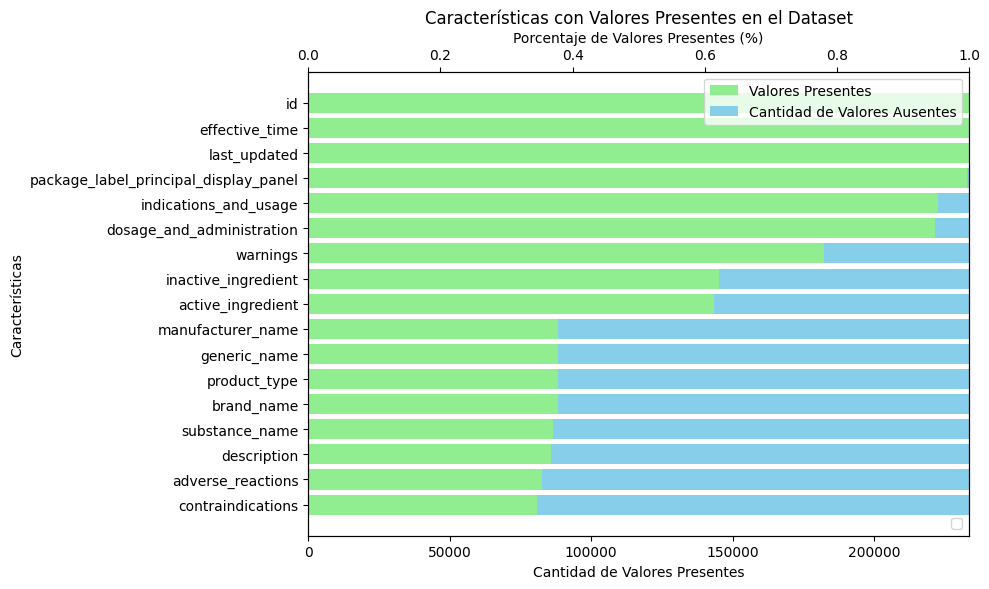

In [263]:
percentil_25 = 65.87

# Filtrar solo las características que están por debajo o igual al percentil 25
df_percentil_25 = resumen_ausentes[resumen_ausentes['Porcentaje Valores Ausentes'] <= percentil_25]

# Crear la figura y el gráfico para las características en el percentil 25
fig, ax1 = plt.subplots(figsize=(10, 6))


# Gráfico de barras para visualizar los valores presentes
ax1.barh(df_percentil_25.index, df_percentil_25['Cantidad de Valores Presentes'], color='lightgreen', label='Valores Presentes')


# Gráfico de barras para la cantidad de valores ausentes en el percentil 25
ax1.barh(df_percentil_25.index, df_percentil_25['Cantidad de Valores Ausentes'], left=df_percentil_25['Cantidad de Valores Presentes'], color='skyblue', label='Cantidad de Valores Ausentes')
ax1.set_xlabel('Cantidad de Valores Presentes')
ax1.set_ylabel('Características')
ax1.invert_yaxis()  # Invertir el eje y para que las barras más grandes estén arriba

# Crear un segundo eje y para el porcentaje de valores ausentes en el percentil 25
ax2 = ax1.twiny()
#ax2.plot(df_percentil_25['Porcentaje Valores Presentes'], df_percentil_25.index, 'o-', color='orange', label='Porcentaje Valores Presentes')
#ax2.set_xlim(100, 0)  # Orden descendente de 100 a 0
ax2.set_xlabel('Porcentaje de Valores Presentes (%)')

# Agregar líneas de percentiles en el gráfico de porcentaje de valores ausentes
#ax2.axvline(x=percentil_25, color='green', linestyle='--', label=f'Percentil 25 ({percentil_25:.2f}%)')
#ax2.axvline(x=percentil_50, color='blue', linestyle='--', label=f'Percentil 50 ({percentil_50:.2f}%)')
#ax2.axvline(x=percentil_75, color='red', linestyle='--', label=f'Percentil 75 ({percentil_75:.2f}%)')

# Agregar leyendas y título
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.title('Características con Valores Presentes en el Dataset')

plt.tight_layout()
plt.show()


In [17]:
# Filtrar solo las columnas en el percentil 25
df_drugs_filtrado = df_drugs[df_percentil_25.index.to_list()]
df_drugs_filtrado = df_drugs_filtrado[df_drugs_filtrado['generic_name'].str.len() > 0]
df_drugs_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88158 entries, 2 to 233537
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     88158 non-null  object
 1   effective_time                         88158 non-null  object
 2   last_updated                           88158 non-null  object
 3   package_label_principal_display_panel  88158 non-null  object
 4   indications_and_usage                  88158 non-null  object
 5   dosage_and_administration              88158 non-null  object
 6   warnings                               88158 non-null  object
 7   inactive_ingredient                    88158 non-null  object
 8   active_ingredient                      88158 non-null  object
 9   manufacturer_name                      88158 non-null  object
 10  generic_name                           88158 non-null  object
 11  product_type       

In [45]:
import pandas as pd
import os

# Tamaño del archivo en MB
file_size_limit = 400

# Contador para el nombre de los archivos
file_count = 1
output_folder = 'output_files'
os.makedirs(output_folder, exist_ok=True)

# Número de filas aproximadas por fragmento
chunk_size = int(len(df_drugs_filtrado) / (df_drugs_filtrado.memory_usage(deep=True).sum() / (1024**2 * file_size_limit)))

# Función para dividir el archivo
for i in range(0, len(df_drugs_filtrado), chunk_size):
    df_chunk = df_drugs_filtrado.iloc[i:i + chunk_size]
    output_path = os.path.join(output_folder, f'chunk_{file_count}.csv')
    df_chunk.to_csv(output_path, index=False)
    file_count += 1


In [19]:
# Realizar estadisticas de las columnas y la longitud de los datos
estadisticas_longitud = {}


column_name = ''
column_detail = []

# Iterar sobre todas las columnas del DataFrame
for columna in df_drugs_filtrado.columns:
    if df_drugs_filtrado[columna].dtype == 'object':
        
        # Calcular la longitud de cada entrada en la columna (número de caracteres) usando apply
        # df_drugs_filtrado[f'longitud_{columna}'] = df_drugs_filtrado[columna].apply(lambda x: len(str(x)))
        
        column_name = f'longitud_{columna}'
        
        # Calcula la longitud de cada entrada en la columna (numero de palabras (tokens) separados por un espacio)
        df_drugs_filtrado[column_name] = df_drugs_filtrado[columna].apply(lambda x: len(str(x).split()))
        
        # Obtener estadísticas descriptivas de la longitud
        stats = df_drugs_filtrado[column_name].describe()
        
        # Almacenar las estadísticas en el diccionario
        estadisticas_longitud[columna] = stats
        
        column_detail.append(column_name)
 
 # Convertir el diccionario de estadísticas en un DataFrame
tabla_estadisticas = pd.DataFrame(estadisticas_longitud).transpose()

# Mostrar la tabla de estadísticas
display(tabla_estadisticas.style.format("{:.0f}"))

,count,mean,std,min,25%,50%,75%,max
id,88158,1,0,1,1,1,1,1
effective_time,88158,1,0,1,1,1,1,1
last_updated,88158,1,0,1,1,1,1,1
package_label_principal_display_panel,88158,49,107,0,4,18,56,6041
indications_and_usage,88158,95,163,0,14,30,93,4403
dosage_and_administration,88158,288,477,0,31,79,347,8307
warnings,88158,161,380,0,0,45,128,5217
inactive_ingredient,88158,16,38,0,0,4,24,4190
active_ingredient,88158,8,16,0,0,4,9,562
manufacturer_name,88158,3,1,1,3,3,4,19


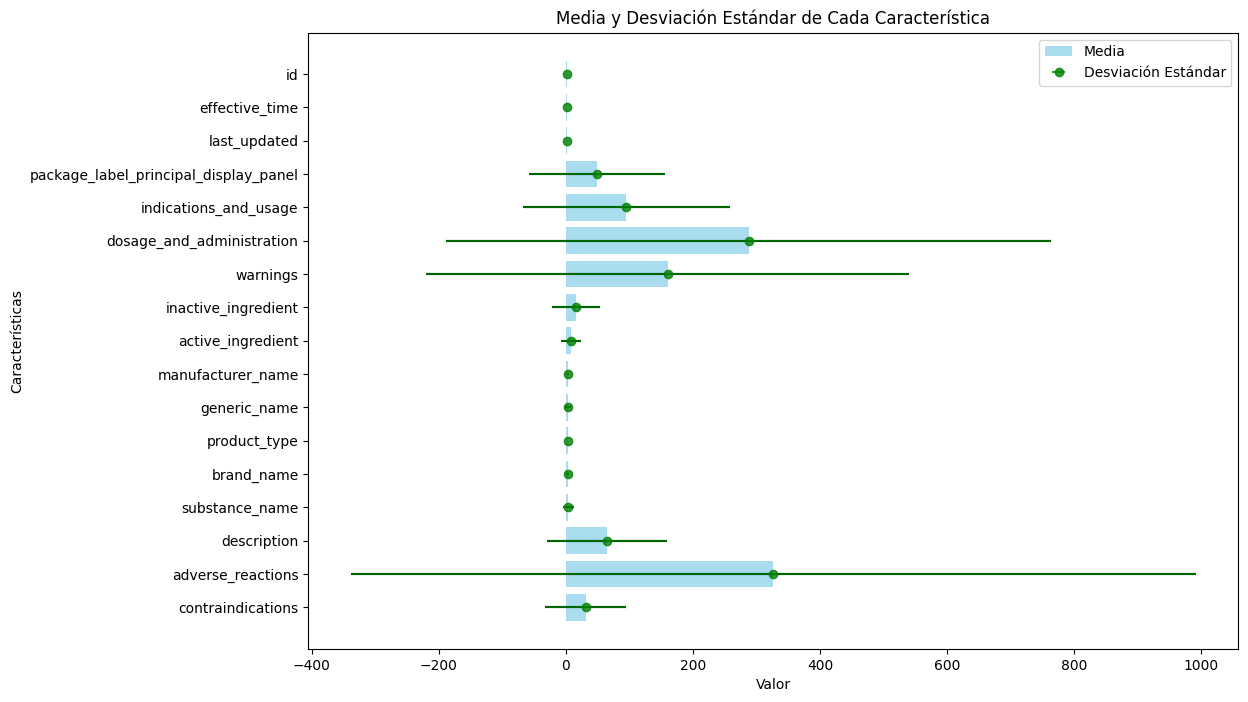

In [20]:
# Extraer las columnas de media y desviación estándar
mean_values = tabla_estadisticas['mean']
std_values = tabla_estadisticas['std']

# Crear una gráfica de barras horizontal
plt.figure(figsize=(12, 8))
plt.barh(mean_values.index, mean_values, xerr=std_values, color='skyblue', alpha=0.7, label='Media')
plt.errorbar(mean_values, mean_values.index, xerr=std_values, fmt='o', color='green', alpha=0.8, label='Desviación Estándar')

# Configurar la gráfica
plt.xlabel('Valor')
plt.ylabel('Características')
plt.title('Media y Desviación Estándar de Cada Característica')
plt.legend()
plt.gca().invert_yaxis()  # Invertir el eje Y para que las etiquetas se lean de arriba hacia abajo
plt.show()


In [29]:
# Crear una lista para almacenar los filtros
filtros = []

# Definir el número de desviaciones estándar para el criterio de normalidad (1 para 68%, 2 para 95%, etc.)
num_std_dev = 1  # Cambiar este valor a 2 o 3 si se desea ampliar el rango

# Aplicar filtro IQR
filtros_iqr = []
for caracteristica in column_detail:
    Q1 = df_drugs_filtrado[caracteristica].quantile(0.25)
    Q3 = df_drugs_filtrado[caracteristica].quantile(0.75)
    IQR = Q3 - Q1
    filtro_iqr = (df_drugs_filtrado[caracteristica] >= Q1 - 1.5 * IQR) & (df_drugs_filtrado[caracteristica] <= Q3 + 1.5 * IQR)
    filtros_iqr.append(filtro_iqr)

# Combinar filtros IQR
filtro_combined_iqr = filtros_iqr[0]
for filtro in filtros_iqr[1:]:
    filtro_combined_iqr &= filtro

# Aplicar el filtro IQR combinado
df_iqr_filtered = df_drugs_filtrado[filtro_combined_iqr]

# Aplicar el filtro de desviación estándar al DataFrame ya filtrado por IQR
filtros_std = []
for caracteristica in column_detail:
    media = df_iqr_filtered[caracteristica].mean()
    desviacion_std = df_iqr_filtered[caracteristica].std()
    filtro_std = (df_iqr_filtered[caracteristica] >= (media - num_std_dev * desviacion_std)) & \
                 (df_iqr_filtered[caracteristica] <= (media + num_std_dev * desviacion_std))
    filtros_std.append(filtro_std)

# Combinar filtros de desviación estándar
filtro_combined_std = filtros_std[0]
for filtro in filtros_std[1:]:
    filtro_combined_std &= filtro

# Aplicar el filtro combinado final
df_final_filtered = df_iqr_filtered[filtro_combined_std]

# Calcular las estadísticas del DataFrame filtrado
stats = df_final_filtered.describe().transpose()
display(stats.style.format("{:.0f}"))


,count,mean,std,min,25%,50%,75%,max
longitud_id,4066,1,0,1,1,1,1,1
longitud_effective_time,4066,1,0,1,1,1,1,1
longitud_last_updated,4066,1,0,1,1,1,1,1
longitud_package_label_principal_display_panel,4066,19,18,0,4,10,34,64
longitud_indications_and_usage,4066,18,11,0,10,15,24,62
longitud_dosage_and_administration,4066,43,31,0,21,35,59,219
longitud_warnings,4066,57,43,0,16,55,89,151
longitud_inactive_ingredient,4066,15,8,2,8,14,22,31
longitud_active_ingredient,4066,6,2,2,5,6,8,10
longitud_manufacturer_name,4066,3,0,3,3,3,4,4


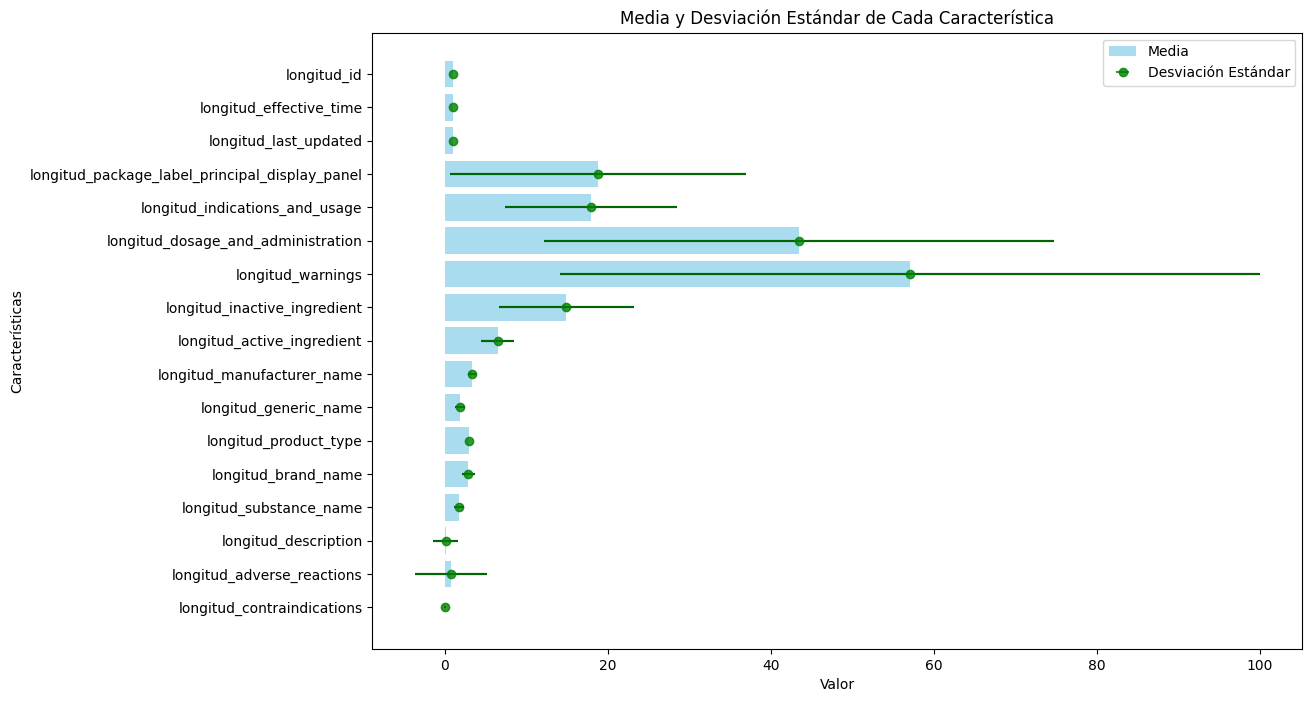

In [30]:

# Extraer las columnas de media y desviación estándar
mean_values = stats['mean']
std_values = stats['std']

# Crear una gráfica de barras horizontal
plt.figure(figsize=(12, 8))
plt.barh(mean_values.index, mean_values, xerr=std_values, color='skyblue', alpha=0.7, label='Media')
plt.errorbar(mean_values, mean_values.index, xerr=std_values, fmt='o', color='green', alpha=0.8, label='Desviación Estándar')

# Configurar la gráfica
plt.xlabel('Valor')
plt.ylabel('Características')
plt.title('Media y Desviación Estándar de Cada Característica')
plt.legend()
plt.gca().invert_yaxis()  # Invertir el eje Y para que las etiquetas se lean de arriba hacia abajo
plt.show()

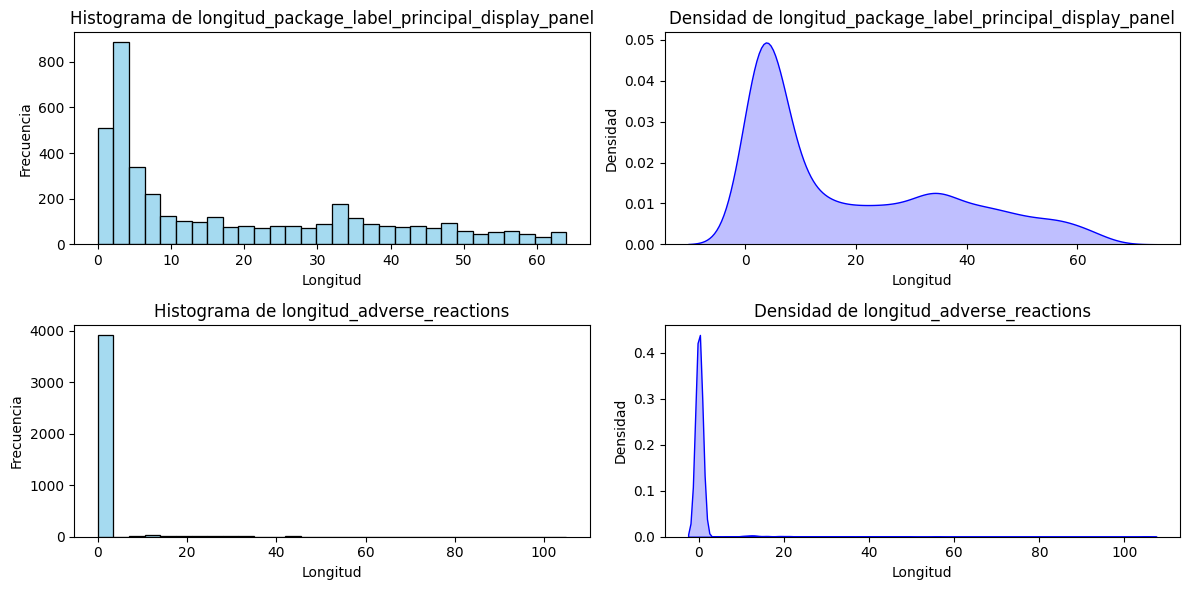

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas con alta desviación estándar
columnas_seleccionadas = ['longitud_package_label_principal_display_panel', 'longitud_adverse_reactions']

# Crear figuras para histogramas y gráficos de densidad
plt.figure(figsize=(12, 3 * len(columnas_seleccionadas)))

for i, col in enumerate(columnas_seleccionadas, 1):
    plt.subplot(len(columnas_seleccionadas), 2, 2 * i - 1)
    sns.histplot(df_final_filtered[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel('Longitud')
    plt.ylabel('Frecuencia')

    plt.subplot(len(columnas_seleccionadas), 2, 2 * i)
    sns.kdeplot(df_final_filtered[col].dropna(), color='blue', fill=True)
    plt.title(f'Densidad de {col}')
    plt.xlabel('Longitud')
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


### Exportamos el dataset pre-procesado

In [251]:
# Eliminar columnas
try:
    df_final_filtered = df_final_filtered.drop(columns=column_detail)
except Exception as ex:
    pass

fastparquet.write(path_data_output_parquet_file, df_final_filtered, compression='SNAPPY')

In [262]:
df_des = df_final_filtered[df_final_filtered['generic_name'] == 'TOLNAFTATE']
df_des

,id,effective_time,last_updated,package_label_principal_display_panel,indications_and_usage,dosage_and_administration,warnings,inactive_ingredient,active_ingredient,manufacturer_name,generic_name,product_type,brand_name,substance_name,description,adverse_reactions,contraindications
17624,17d04d97-1711-44af-e063-6394a90ac8c8,20240506,2024-10-26,Principal Display Panel equate MAXIMUM STRENGT...,Uses proven clinically effective in the treatm...,​Directions clean the affected area and dry th...,Warnings For external use only. Do not use on ...,"​Inactive ingredient WATER, GLYCERIN, SCLEROTI...",​Active ingredient Tolnaftate 1%,"Wal-Mart Stores, Inc.",TOLNAFTATE,HUMAN OTC DRUG,Antifungal Liquid,TOLNAFTATE,,,
18797,0b82635d-60b7-820c-e063-6294a90ac036,20231202,2024-10-26,Package Labeling: Signature 814,Uses proven clinically effective in the treatm...,Directions wash affected area and dry thorough...,Warnings For external use only Flammable: Do n...,"Inactive Ingredients alcohol denat, aluminum s...",Active ingredient Tolnaftate 1% Purpose Antifu...,"Formulated Solutions, LLC",TOLNAFTATE,HUMAN OTC DRUG,Signature Athletes Foot Antifungal,TOLNAFTATE,,,
19228,09d7052e-ec64-ef60-e063-6294a90af214,20231110,2024-10-26,Package Labeling: Label,Uses: Proven clinically effective in the treat...,Directions: Clean the affected area and dry th...,Warnings: For external use only. Do not use on...,"Inactive ingredients: N-Acetylcysteine, Beeswa...",Active ingredient Tolnaftate 1% Purpose Topica...,Clinical Therapeutic Solutions,TOLNAFTATE,HUMAN OTC DRUG,CLARUS AC Antifungal Solution,TOLNAFTATE,,,
22827,2479a7aa-c4de-5806-e063-6294a90a664d,20241014,2024-10-26,Principal Display Panel meijer MAXIMUM STRENGT...,Uses For the treament of athlete's foot (tinea...,​Directions wash the affected area and dry tho...,Warnings For external use only. Do not use on ...,"​Inactive ingredient Acetone, Water, Propylene...",​Active ingredient Tolnaftate 1% w/w,Meijer Distribution Inc,TOLNAFTATE,HUMAN OTC DRUG,Maximum Strength Antifungal Liquid,TOLNAFTATE,,,
23149,24708cad-85dd-7ea7-e063-6294a90a93b3,20241014,2024-10-26,PRINCIPAL DISPLAY PANEL - label label,Uses proven clinically effective in the treatm...,Directions clean the affected area and dry tho...,Warnings For external use only. Do not use on ...,"Inactive ingredients ceteth-20, cetyl alcohol,...",Active ingredient Tolnaftate 1%,Efficient Laboratories Inc,TOLNAFTATE,HUMAN OTC DRUG,Hongo Killer,TOLNAFTATE,,,
40268,05548b3f-79e2-24c2-e063-6394a90ad2d7,20230914,2024-10-26,Package Display 3 oz. label LOTRIMIN® AF TOLNA...,Use Use • clinically proven to prevent most at...,Directions Directions • to prevent athlete's f...,Warnings For external use only Do not use on c...,Inactive ingredients benzethonium chloride;cor...,Active ingredient Tolnaftate 1%,Bayer HealthCare LLC.,TOLNAFTATE,HUMAN OTC DRUG,Lotrimin Daily Prevention,TOLNAFTATE,,,
40935,0b7d0c0b-2732-36f6-e063-6294a90a7c17,20231201,2024-10-26,hiveticsolncart.jpg Carton,Uses ■ for effective treatment of most athlete...,Directions ■for the tratment of athlete’s foot...,Warnings For external use only Extremely flamm...,"Inactive ingredients acetone, citric acid, die...",Active ingredient Tolnaftate 1%,"Sato Pharmaceutical Co., Ltd.",TOLNAFTATE,HUMAN OTC DRUG,Hi Vetic,TOLNAFTATE,,,
44057,2011371d-1553-4378-8b63-0ae434f0a0e5,20240118,2024-10-26,Tolnaftate label,Proven clinically effective in the treatment o...,Wash affected area and dry thoroughly Apply a ...,For external use only When using this product ...,"Ceteth 20, Cetyl Alcohol, Methylparaben, Miner...",Tolnaftate 1%,"New World Imports, Inc",TOLNAFTATE,HUMAN OTC DRUG,CAREALL Tolnaftate,TOLNAFTATE,,,
46181,2473a972-fc5a-f0ed-e063-6294a90a4219,20241014,2024-10-26,Principle Display Panel Version 3,Use Cures most fungus on toes,Directions Wash the affected area and dry thor...,Warnings Do not use on children under 2 years ...,"Inactive Ingredients Alpha-Bisabolene, Chlorph...",Active ingredient Tolnaftate,Imper